**EXP #4 | Raghad Afaghani 1192423**





---



In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!python -m pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
! python -m pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.10.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.42
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
cryptography==41.0.4
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy

In [ ]:
! python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-5.15.120+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.3.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.23.5
        scipy: 1.11.3
       Cython: 3.0.4
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 2
         prefix: libgomp
       filepath: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
        

1.1 **Regression**

In [ ]:
import numpy as np
def true_fun(X):
  return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

Plot both the training and testing examples in a scatter plot and show the true
function curve for the range [0, 1).

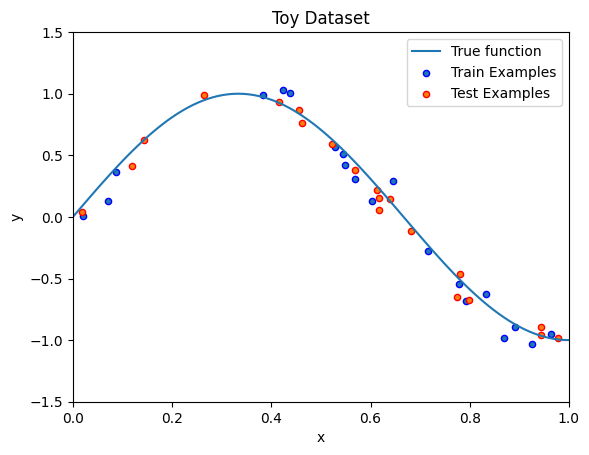

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()


1.1.2 Linear **regression**

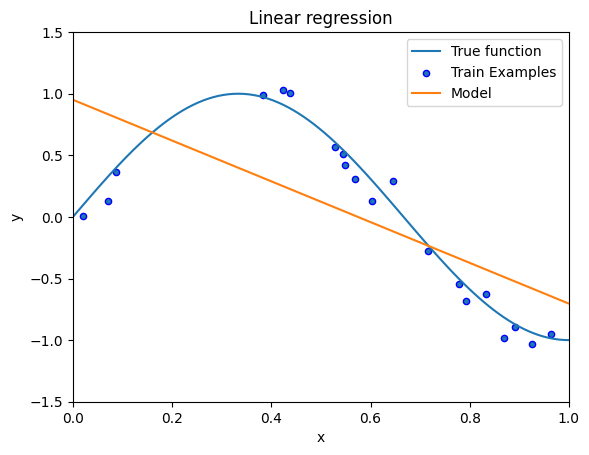

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()


**TASK 1**

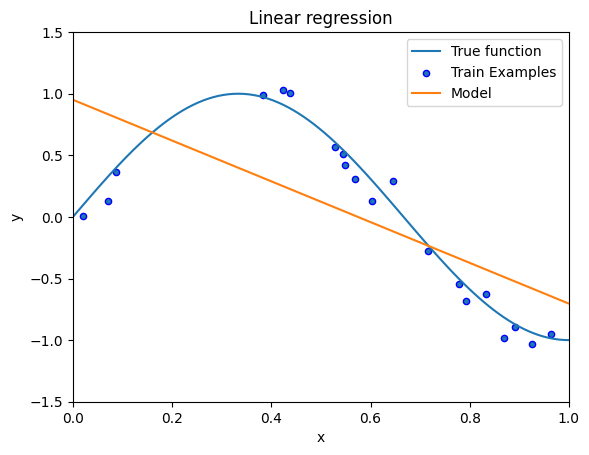

Mean Squared Error on the Test Set: 0.1736489094130998


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)

# Make predictions on the test set
y_test_pred = linear_regression.predict(X_test[:, np.newaxis])

# Compute the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_test_pred)

# Plot the results as you mentioned
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

# Print the Mean Squared Error
print(f"Mean Squared Error on the Test Set: {mse}")


1.1.3 Polynomial **regression**

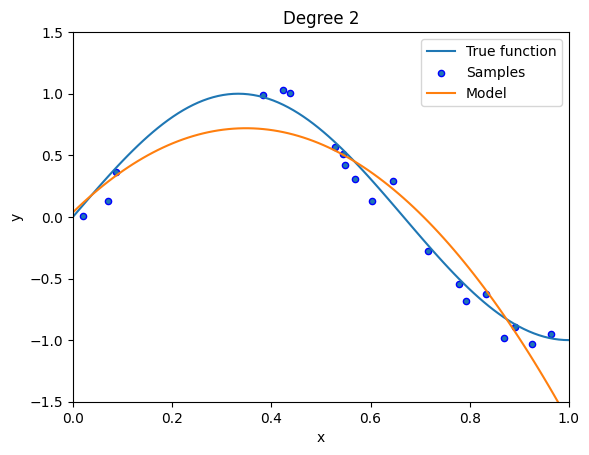

Mean Squared Error on the Test Set: 0.05626601819711916


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = q_model.predict(polynomial_features.transform(X_test[:, np.newaxis]))

# Compute the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_test_pred)

# Print the mean squared error
print(f"Mean Squared Error on the Test Set: {mse}")


TASK **2**

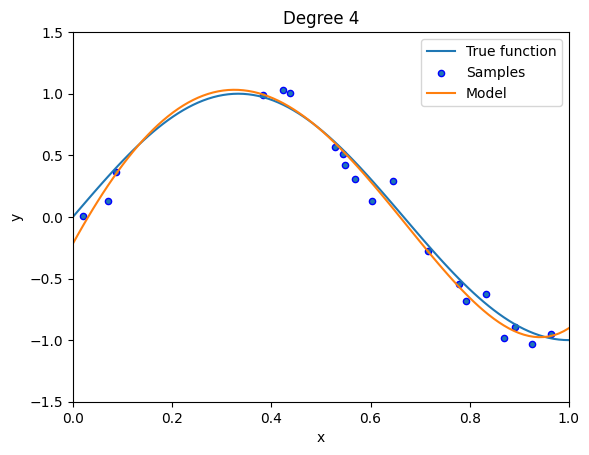

Mean Squared Error on the Test Set: 0.004641799299812718


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(4, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 4")
plt.show()

from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = q_model.predict(polynomial_features.transform(X_test[:, np.newaxis]))

# Compute the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_test_pred)

# Print the mean squared error
print(f"Mean Squared Error on the Test Set: {mse}")


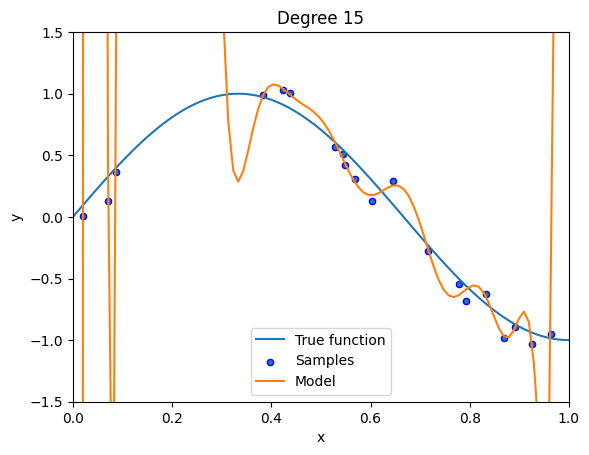

Mean Squared Error on the Test Set: 503.6525031549251


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(15, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 15")
plt.show()


from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = q_model.predict(polynomial_features.transform(X_test[:, np.newaxis]))

# Compute the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_test_pred)

# Print the mean squared error
print(f"Mean Squared Error on the Test Set: {mse}")


1.2 **Classification**

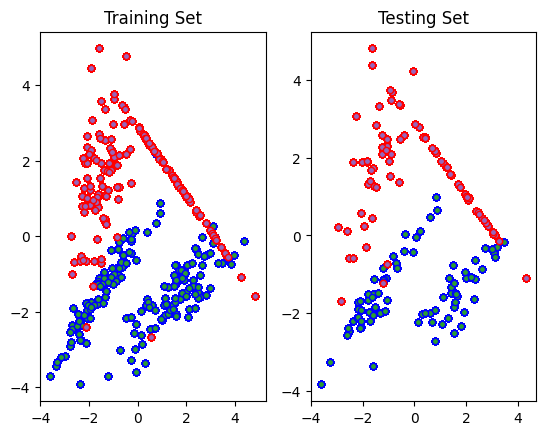

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,n_informative=2, n_redundant=0,n_clusters_per_class=2, random_state=0,
shuffle=True, class_sep=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in y_train:
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
    [X_train[i, 1] for i in np.where(y_train==c)],
    edgecolor=colors[c], s=20, label="Samples")
  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
    [X_test[i, 1] for i in np.where(y_test==c)],
    edgecolor=colors[c], s=20, label="Samples")

**1.2.2 Classification with random forests**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,criterion="entropy",max_features="sqrt", max_samples=.8,random_state=0)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


For classification, accuracy is not the only used metrics. There are many other
metrics such as precision, recall, F1-score, ...etc. All of these metrics can be derived
form the the confusion matrix. The following code computes the confusion matrix
for the random forest trained in the previous part.

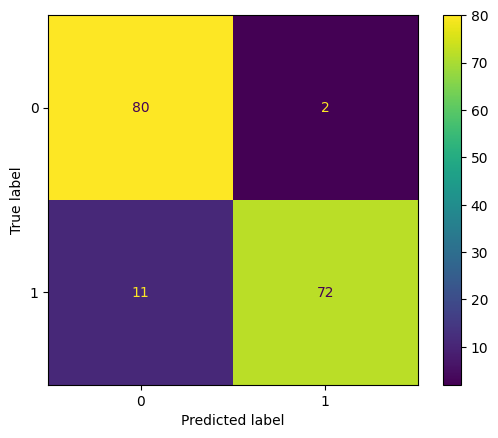

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()


**Task 5:** Train different random forests by changing the number of trees from 2 to 15.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=15, random_state=0)
regressor.fit(X_train.reshape(-1, 1), y_train)

print("Training Accuracy: ", regressor.score(X_train.reshape(-1, 1), y_train))
print("Testing Accuracy: ", regressor.score(X_test.reshape(-1, 1), y_test))


Training Accuracy:  0.9897710524554264
Testing Accuracy:  0.9766830050473972


**Decision surface** is a plot that shows how a machine learning model divides the feature space to different class labels

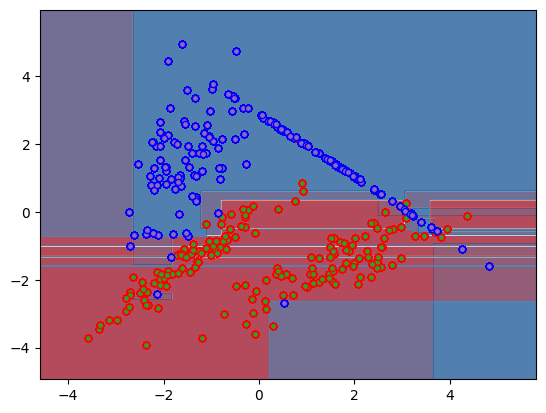

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
max_features="sqrt", max_samples=.8,
random_state=0)
clf.fit(X_train, y_train)
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
              [X_train[i, 1] for i in np.where(y_train==c)],
              edgecolor=colors[c], s=20, label="Samples")

**Task 6:** Draw the decision surface for a set of random forests with different number
of trees. Do you notice any pattern?

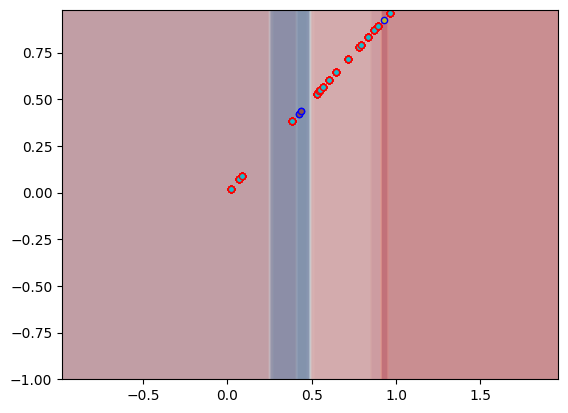

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Verify and convert labels to integers (if not already)
y_train = y_train.astype(int)

# Reshape X_train if it's one-dimensional
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

cmap = plt.cm.RdBu
plot_step = 0.02

# Create the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15, criterion="entropy", max_features="sqrt", max_samples=0.8, random_state=0)

# Fit the classifier
clf.fit(X_train, y_train)

# Adjust mesh grid calculation for one-dimensional data
x_min, x_max = X_train.min() - 1, X_train.max() + 1
y_min, y_max = -1, 1  # Adjust the y-axis limits as needed
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
colors = ["r", "b"]
for c in y_train:
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 0] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")

plt.show()


**1.2.3 Classification with SVM**

SVM tries to find a separating hyper-plane between the classes with rthe
maximum margin

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


**Task 7:** Draw the decision surface for the SVM model in the previous example.

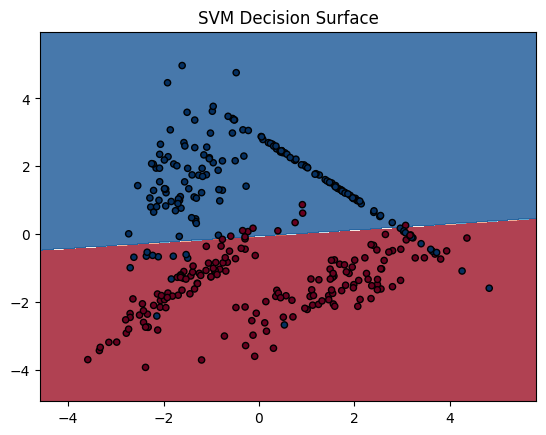

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Create the SVM model
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)

# Predict the decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Surface")
plt.show()


**Task 8:** Train an SVM model with rbf kernel and draw its decision boundary. What
do you notice?

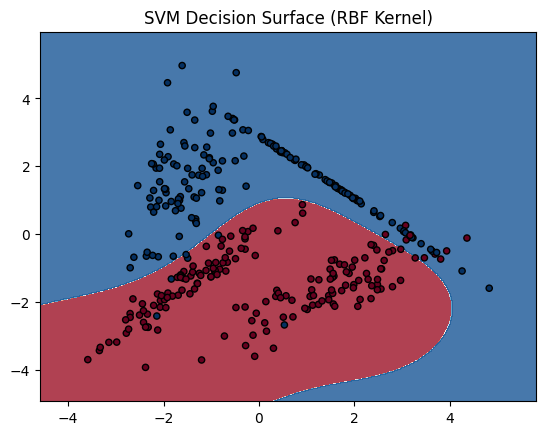

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Create the SVM model with RBF kernel
clf = svm.SVC(kernel="rbf", C=1)
clf.fit(X_train, y_train)

# Predict the decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Surface (RBF Kernel)")
plt.show()


With the RBF kernel, the SVM model can capture more complex and nonlinear decision boundaries. You'll notice that the decision boundary is curved and can adapt to more intricate patterns in the data.

**Task 9:** Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?

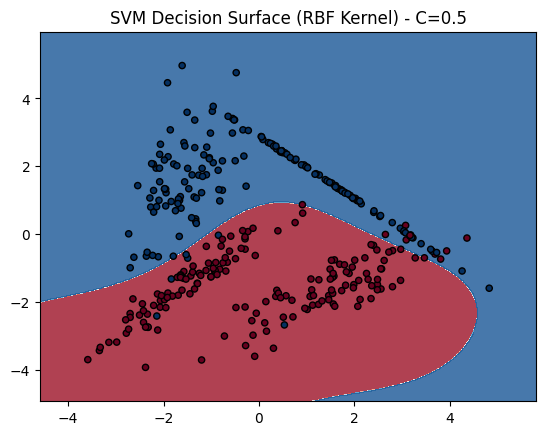

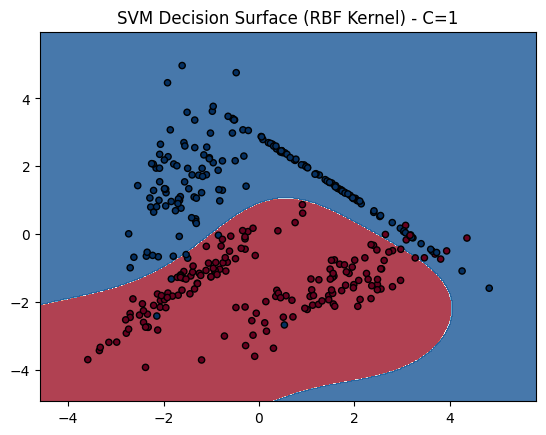

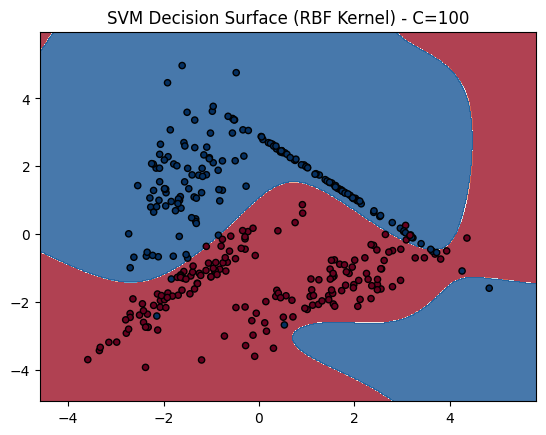

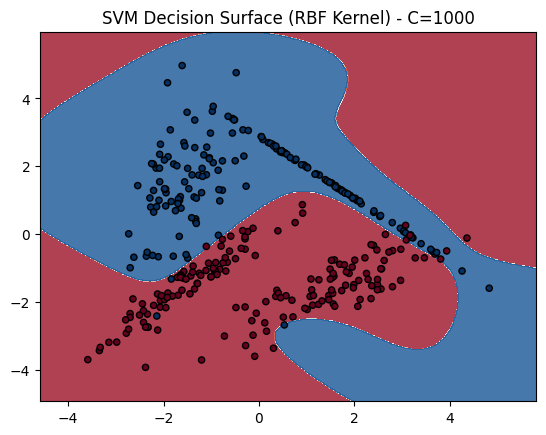

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Values of C to iterate over
C_values = [0.5, 1, 100, 1000]

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Iterate over different values of C
for C in C_values:
    # Create the SVM model with RBF kernel
    clf = svm.SVC(kernel="rbf", C=C)
    clf.fit(X_train, y_train)

    # Predict the decision boundaries
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot the data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"SVM Decision Surface (RBF Kernel) - C={C}")
    plt.show()


C=100 (High Regularization):

The decision boundary becomes more rigid and tries to classify every training point correctly.
It may overfit the data if the dataset is noisy or complex.

C=1000 (Very High Regularization):

The decision boundary becomes extremely rigid and focuses on classifying individual data points correctly.
It's prone to overfitting.

**1.3 Hyper-parameters selection**

To select hyper-parameters, usually we search the hyper-parameter space for the
best cross-validation score (or if the dataset is large enough, we could search for the
parameters with the best score on a validation set).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)


{'C': 10, 'kernel': 'rbf'}
